# Color Extractor
## This is a Google Colab Notebook showcasing how to efficiently and easily extract the colors of an image using python. We also show how to perform color quantization using OpenCV.


## Step 1: Imports

In [1]:
# Imports
from google.colab import files
import cv2 as cv
from PIL import Image
import time
import numpy as np
import matplotlib.pyplot as plt

## Step 2: Upload your image(s)

In [2]:
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving cyrus-chew-Dl39g6QhOIM-unsplash.jpg to cyrus-chew-Dl39g6QhOIM-unsplash.jpg
User uploaded file "cyrus-chew-Dl39g6QhOIM-unsplash.jpg" with length 1988791 bytes


## Step 3: Extract the n most present colors in the image

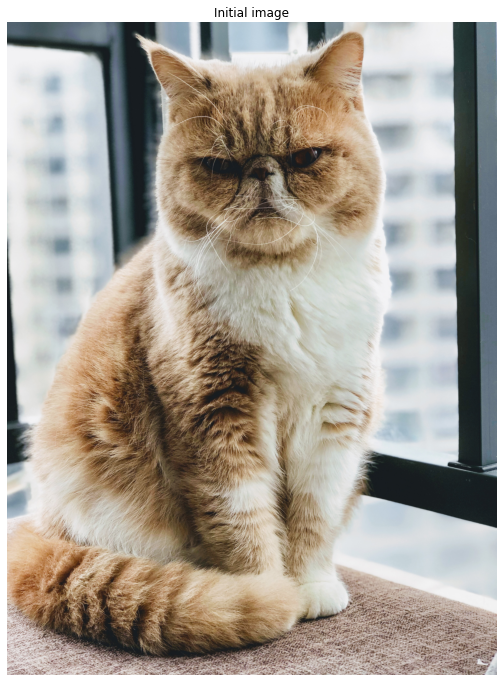

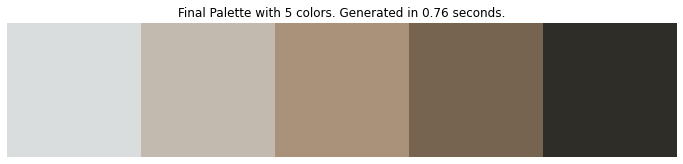

In [3]:
n_colors = 5
img_max_dim = 256
final_palettes = []
quanticized_images = []
resized_imgs = []
accuracy_aimed = 1.0  # Stop iterating if the specified accuracy is reached.
max_iter = 45  # Stop the algorithm after the specified number of iterations.

for fn in uploaded.keys():
  start_time = time.time()
  img = Image.open(fn).convert('RGB')

  # Resize image for computation while keeping aspect ratio
  resized_width = int((img_max_dim * min(img.size)) / max(img.size))
  resized_img = img.copy()
  resized_img.thumbnail((img_max_dim, img_max_dim), Image.ANTIALIAS)

  # Reshape for k-means
  resized_img = np.array(resized_img, np.float32)

  # Extract the n most present colors
  # The algorithm stops iterating when any of the above conditions are met.
  criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, max_iter, 
              accuracy_aimed)
  
  # KMEANS_PP_CENTERS: initializing centers that are far away from one another, 
  # helps to reduce the randomness in the results.
  _, labels, centers = cv.kmeans(resized_img.reshape(-1,3), n_colors, None, 
                                 criteria, 10, flags=cv.KMEANS_PP_CENTERS)
  
  # Find the biggest centers in descending order
  unique, counts = np.unique(labels, return_counts=True)
  labels_ordered = unique[counts.argsort()[::-1]]

  # Reorder colors by presence in the image - in descending order
  ordered_palette = centers[labels_ordered].astype(int)
  end_time = time.time() - start_time

  # Save color palette and elements for future visualizations
  final_palettes.append(ordered_palette)

  # Quanticize the image by reconstructing it with only the extracted colors
  quanticized_images.append(np.uint8(centers)[labels.flatten()]
                            .reshape((resized_img.shape)))
  resized_imgs.append(resized_img)

  # Display the initial image and extracted palette
  plt.figure(figsize=(12,12))
  plt.title("Initial image")
  plt.imshow(img)
  plt.grid()
  plt.axis('off')
  plt.show()

  plt.figure(figsize=(12,12))
  plt.imshow(ordered_palette[:n_colors][np.concatenate([[i] * 100 for i in range(len(ordered_palette[:n_colors]))]).reshape((-1,10)).T])
  plt.title(f"Final Palette with {n_colors} colors. Generated in %.2f seconds." % end_time)
  plt.grid()
  plt.axis('off')
  plt.show()

  print("\n")

## Color quantization

Having this new palette, you can play with the original image to reconstruct it using only these colors, which is called color quantization as seen in the article https://en.wikipedia.org/wiki/Color_quantization.

I invite you to play with the algorithm using different color combinations to better understand how it works!

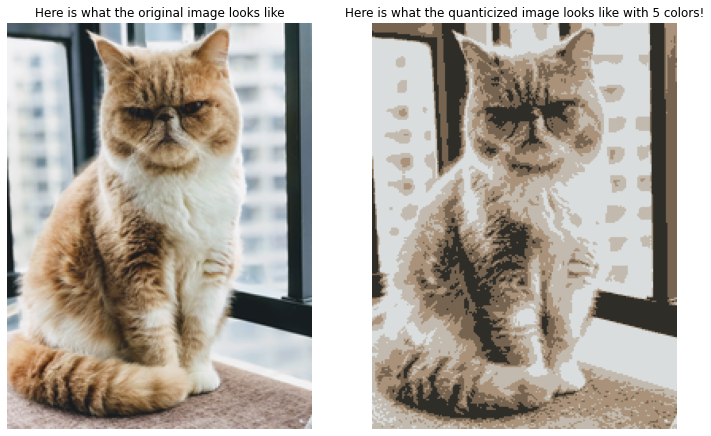

In [4]:
# Plot the quanticized images
for index, quanticized_image in enumerate(quanticized_images):
  plt.figure(figsize=(12,12))
  plt.subplot(1,2,1)
  plt.title("Here is what the original image looks like")
  plt.grid()
  plt.axis('off')
  plt.imshow(resized_imgs[index]/255.0)
  plt.subplot(1,2,2)
  plt.title(f"Here is what the quanticized image looks like with {n_colors} colors!")
  plt.grid()
  plt.axis('off')
  plt.imshow(quanticized_image)
  print("\n")

## Next step: Build a better palette!
Use color harmony expert knowledge to understand the relation of the color in the extracted colors and build the best looking palette possible out of this image!

Here are a few tips:
- Try changing the color space! You can look at colors in different ways such as RGB, HSV, LAB, etc. HSV is a great space to better understand color relations.
- There is no general consensus on how and why a palette looks beautiful. Your best shot is to take a look at basic color harmonies and build a code that will try to follow them.
- Base yourself on the current trends, look at color palettes websites and try to orient your results towards them!
- It doesn't have to be perfect! Have fun, play with it, and build something great! Colors are a subjective thing. Some people will love them while some will hate them. You just want to allow customization to your tools as you can't force them to like a color schema.

### This is where you play with your results!
Take your palettes in the `final_palettes` list and build a code to make them look better!

*Send us your code updates and results at louis@designstripe.com. We would love to see what you achieve and give our feedback!*


In [5]:
# Add your code here and start testing right away!
